In [102]:
#Importing libraries
import cv2
import pytesseract
import numpy as np
import os
import sys

sys.path.append(os.path.join(".."))

#display utils
from utils_ross.imutils import jimshow
from utils_ross.imutils import jimshow_channel


In [103]:
os.getcwd()

'/home/cds-au579253/cds-visual/Homework/Final_project/src'

In [104]:
#Loading image using OpenCV
img = cv2.imread(os.path.join("..", "Data", "image2.jpg"))

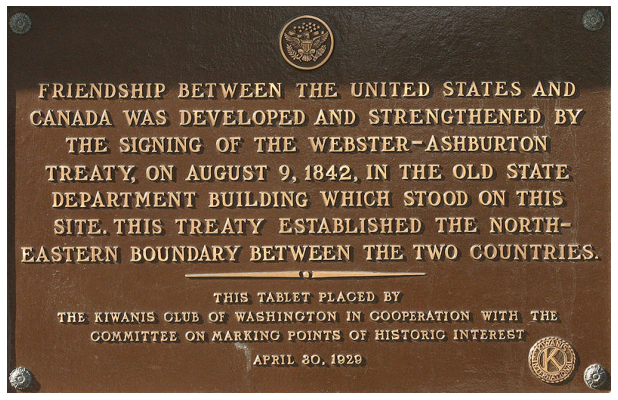

In [105]:
jimshow(img)

In [106]:
img.shape

(512, 800, 3)

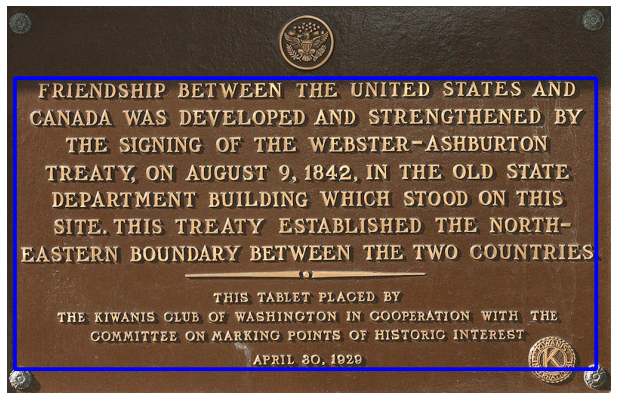

In [107]:
#Creating the blue rectangle box of the region of interest, which contains the text
# Measures are just found by trying and failing
cv2.rectangle(img, (780,480), (10, 95), (255, 0, 0), 3) #cv2.rectangle( image, start_point, end_pont, color, thickness)
#Showing the image with ROI
jimshow(img)

In [108]:
#Defining the center of the image
(centerX, centerY) = (img.shape[1]//2, img.shape[0]//2)

In [109]:
centerX

400

In [110]:
centerY

256

In [111]:
#Cropping the image based on the centers
cropped_image = img[centerY-700:centerY+550, centerX-395: centerX+380]
##Cropping the image based on the centers
#cropped_image = img[centerY-95:centerY+300, centerX-2000: centerX +4000]

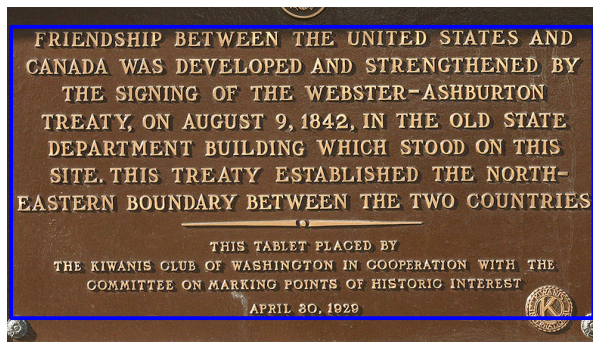

In [112]:
jimshow(cropped_image)

In [113]:
#Preprocessing image
#Converting to grayscale
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

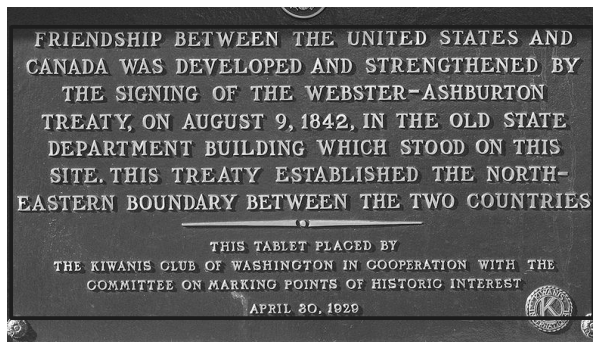

In [114]:
jimshow_channel(gray_image)

In [115]:
#creating Binary image by selecting proper threshold
binary_image = cv2.threshold(gray_image ,130,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

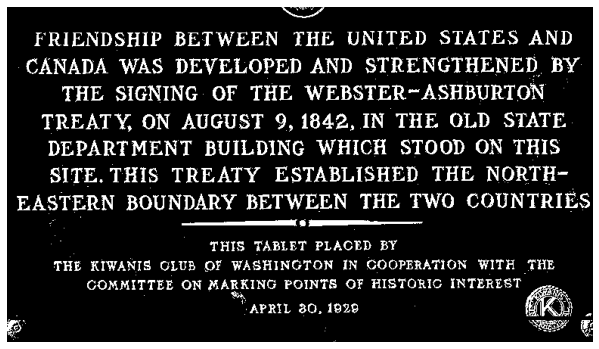

In [116]:
jimshow_channel(binary_image)

In [117]:
#Inverting the image, so we get a white backround and black text
inverted_bin = cv2.bitwise_not(binary_image)

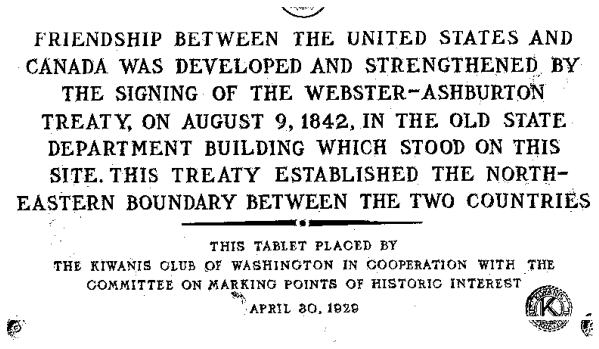

In [118]:
jimshow_channel(inverted_bin)

In [119]:
#Applying image_to_string method
text = pytesseract.image_to_string(inverted_bin)

In [120]:
print(text)

 

ee
FRIENDSHIP BETWEEN THE UNITED STATES AND
CANADA WAS DEVELOPED AND STRENGTHENED BY
THE SIGNING OF THE WEBSTER~ASHBURTON
TREATY, ON AUGUST 9, 1842, IN THE OLD STATE
DEPARTMENT BUILDING WHICH STOOD ON THIS
SITE. THIS TREATY ESTABLISHED THE NORTH-
EASTERN BOUNDARY BETWEEN THE TWO COUNTRIES

 

 

THIS TABLET PLACED BY

THE KIWANIS CLUB OF WASHINGTON IN COOPERATION WITH THE

GOMMITTEE ON MARKING POINTS OF HISTORIC INTEREST
"APRIL 80, 1929

 
 

et



In [127]:
#Reduce noise on the image
kernel = np.ones((2,2),np.uint8)# dtype uninteger
processed_img = cv2.erode(inverted_bin, kernel, iterations = 1) 
processed_img = cv2.dilate(processed_img, kernel, iterations = 1)

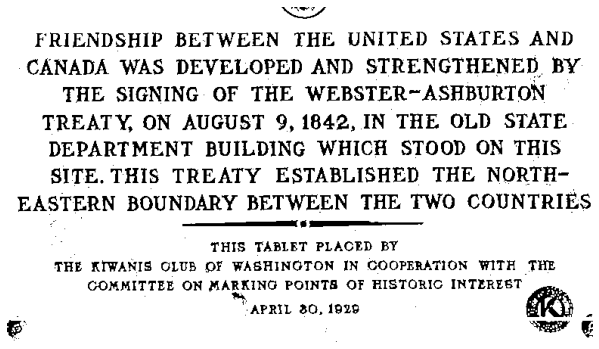

In [128]:
jimshow_channel(processed_img)

In [123]:
#Applying image_to_string method
text = pytesseract.image_to_string(processed_img)

In [124]:
print(text)

ne

FRIENDSHIP BETWEEN THE UNITED STATES AND

CANADA WAS DEVELOPED AND STRENGTHENED, BY
THE SIGNING OF THE WEBSTER~ASHBURTON

TREATY, ON AUGUST 9, 1842, IN THE OLD STATE

DEPARTMENT BUILDING WHICH STOOD ON THIS

SITE. THIS TREATY ESTABLISHED THE NORTH-
EASTERN BOUNDARY BETWEEN THE TWO COUNTRIES

 

 

THIS TABLET PLACED BY
THE KIWANIS OLUB OF WASHINGTON IN COOPERATION WITH THE
COMMITTEE ON MARKING POINTS OF HISTORIC INTEREST
NAPRIL 30, 1929 Oe .
eS SRE



In [125]:
processed = text.replace("\n"," "),

In [126]:
print(processed)

('ne  FRIENDSHIP BETWEEN THE UNITED STATES AND  CANADA WAS DEVELOPED AND STRENGTHENED, BY THE SIGNING OF THE WEBSTER~ASHBURTON  TREATY, ON AUGUST 9, 1842, IN THE OLD STATE  DEPARTMENT BUILDING WHICH STOOD ON THIS  SITE. THIS TREATY ESTABLISHED THE NORTH- EASTERN BOUNDARY BETWEEN THE TWO COUNTRIES        THIS TABLET PLACED BY THE KIWANIS OLUB OF WASHINGTON IN COOPERATION WITH THE COMMITTEE ON MARKING POINTS OF HISTORIC INTEREST NAPRIL 30, 1929 Oe . eS SRE \x0c',)


In [101]:
type(processed)

tuple